In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
import pandas as pd
creditFraudTrain = pd.read_csv('fraudTrain.csv')
creditFraudTrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
creditFraudTrain.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

# Drop useless columns

In [4]:
creditFraudTrain = creditFraudTrain.drop(['cc_num', 'street', 'zip', 'first', 'last', 'trans_num', 'dob'], axis=1)

In [5]:
creditFraudTrain.head()

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


# Count is_fraud

<Axes: xlabel='is_fraud', ylabel='count'>

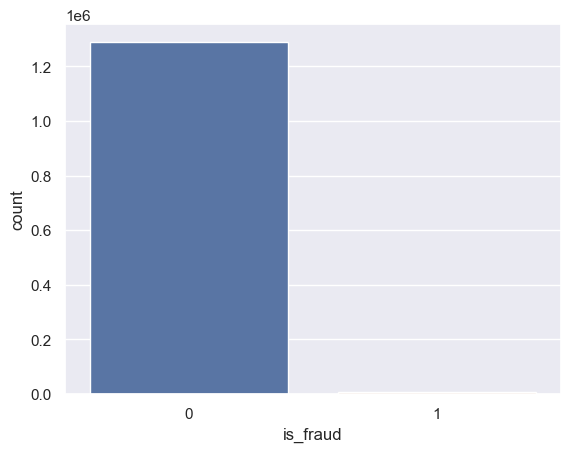

In [6]:
sb.countplot(data=creditFraudTrain, x='is_fraud')

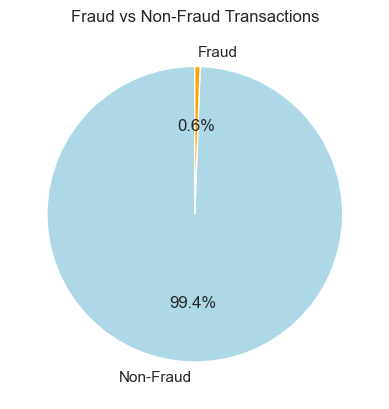

In [7]:
fraud_counts = creditFraudTrain['is_fraud'].value_counts()

labels = ['Non-Fraud', 'Fraud']

plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

In [8]:
fraud_counts = creditFraudTrain['is_fraud'].value_counts()

print(fraud_counts)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


# Handle categorical Variables
### Use bar plots to visualize the distribution of categorical variables and to compare them based on fraud (is_fraud)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

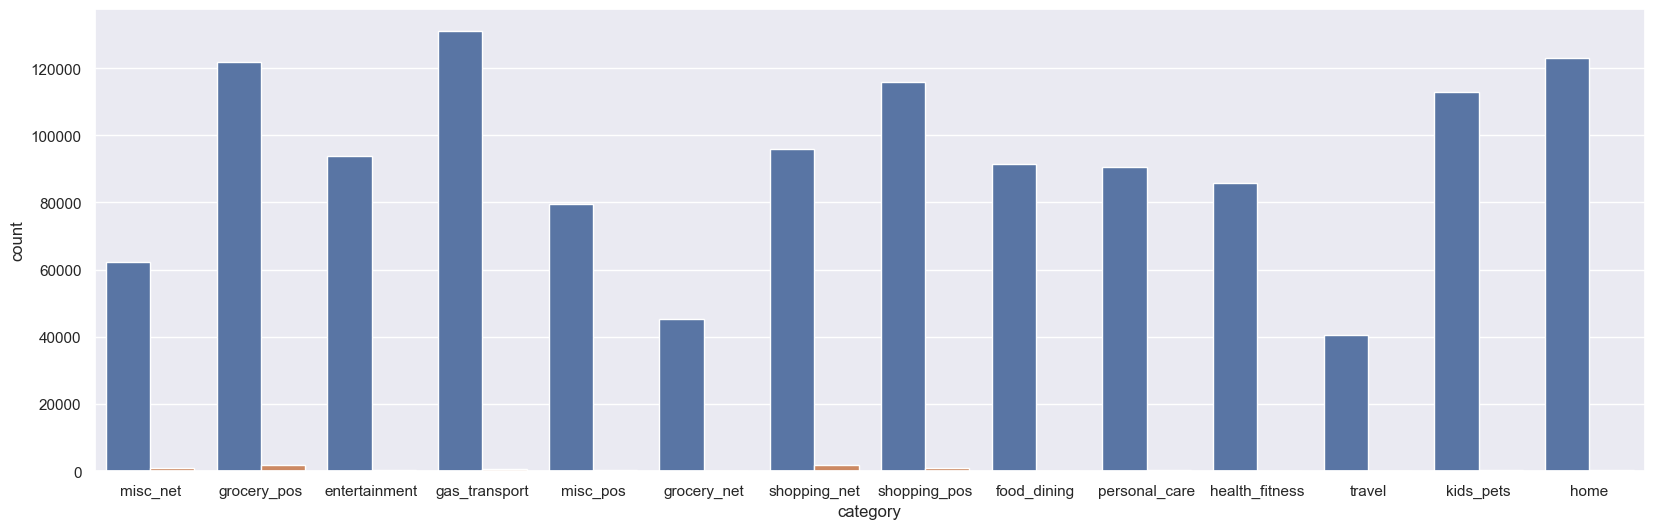

In [9]:
# List of columns to create bar plots for
columns = ['category', 'gender', 'job', 'city', 'state']

for col in columns:
    plt.figure(figsize=(20, 6))  # Create a new figure for each plot
    sb.countplot(data=creditFraudTrain, x=col, hue='is_fraud')
    plt.title(f'Distribution of {col} in Fraud and Non-Fraud Transactions')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

### Imbalanced Fraud and Non-Fraud Transactions:
Zoom in: Plot fraud only

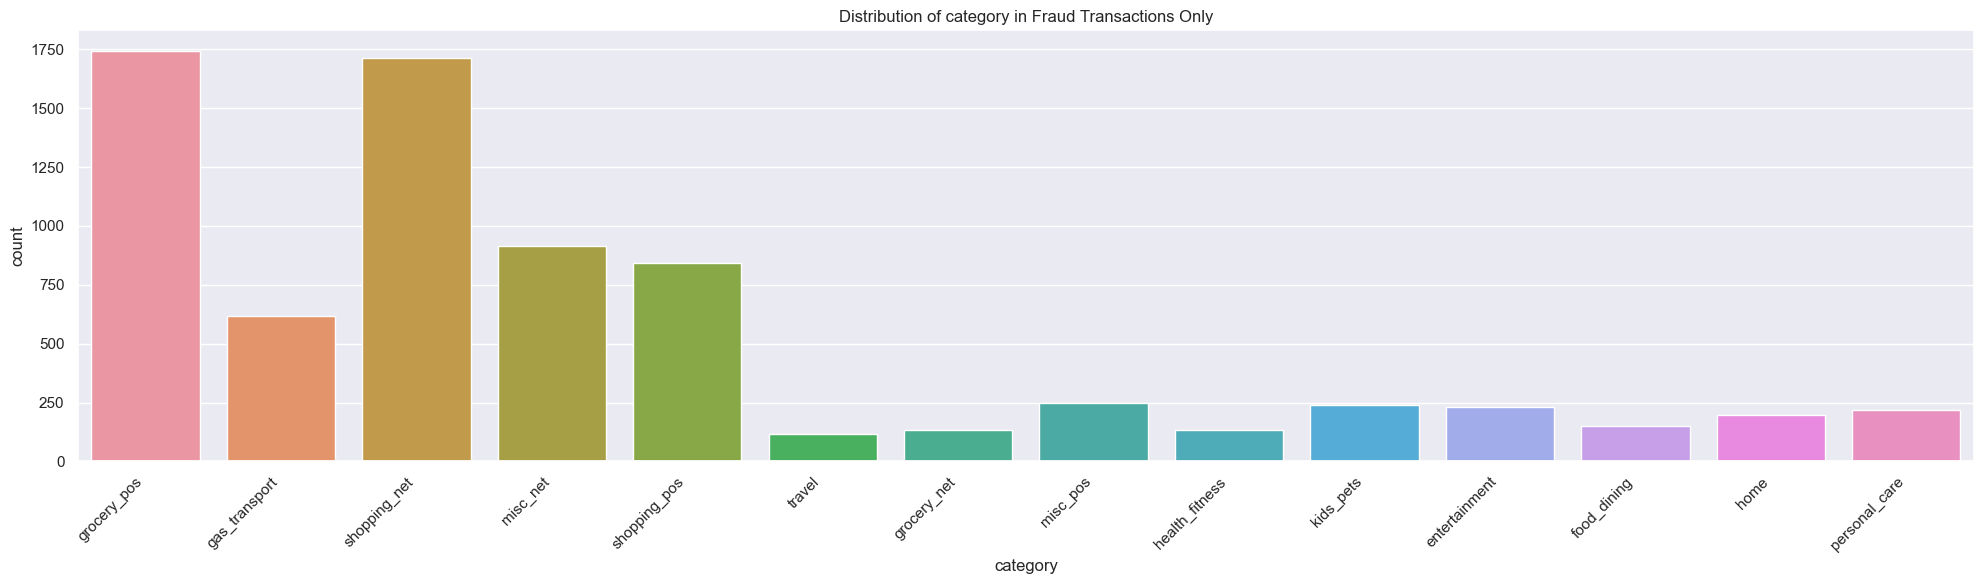

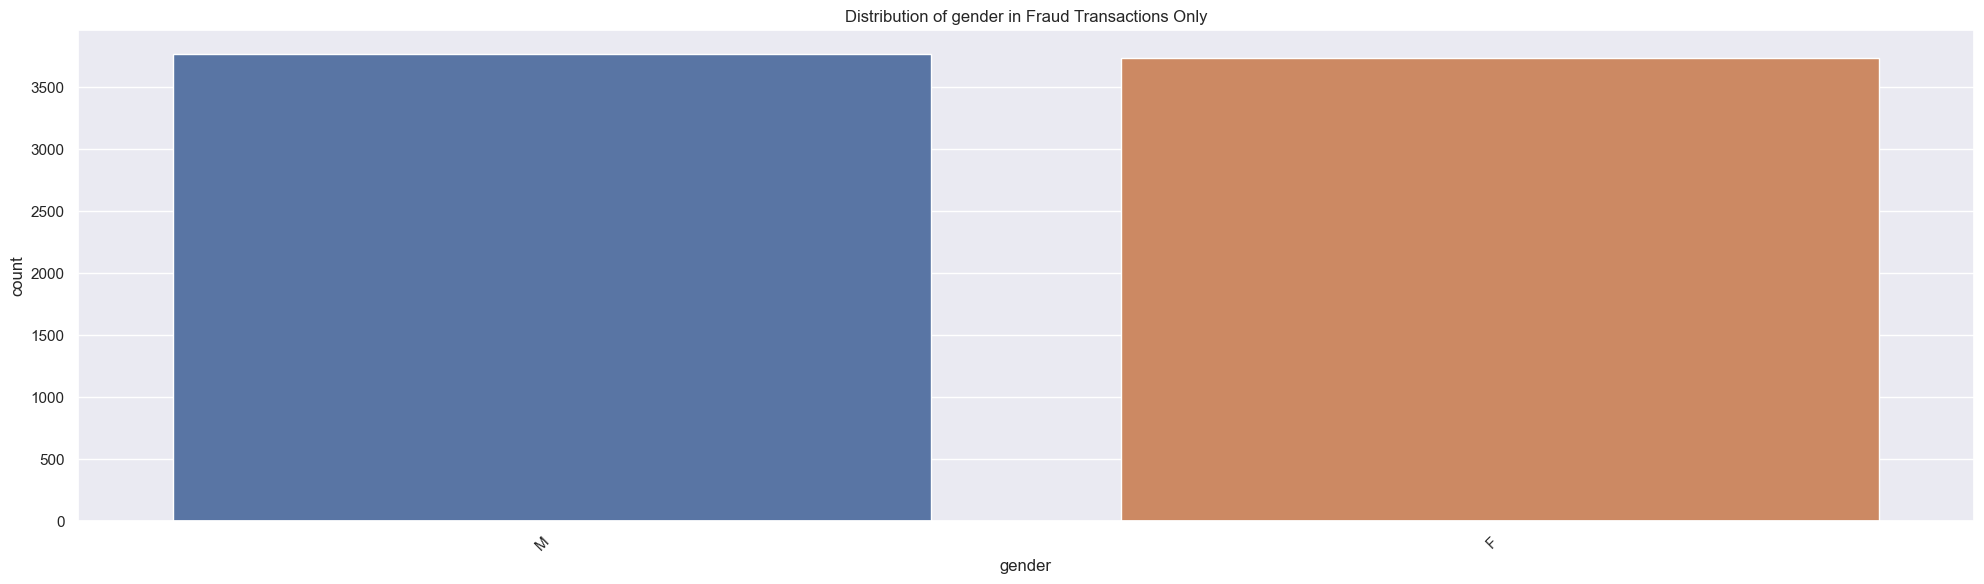

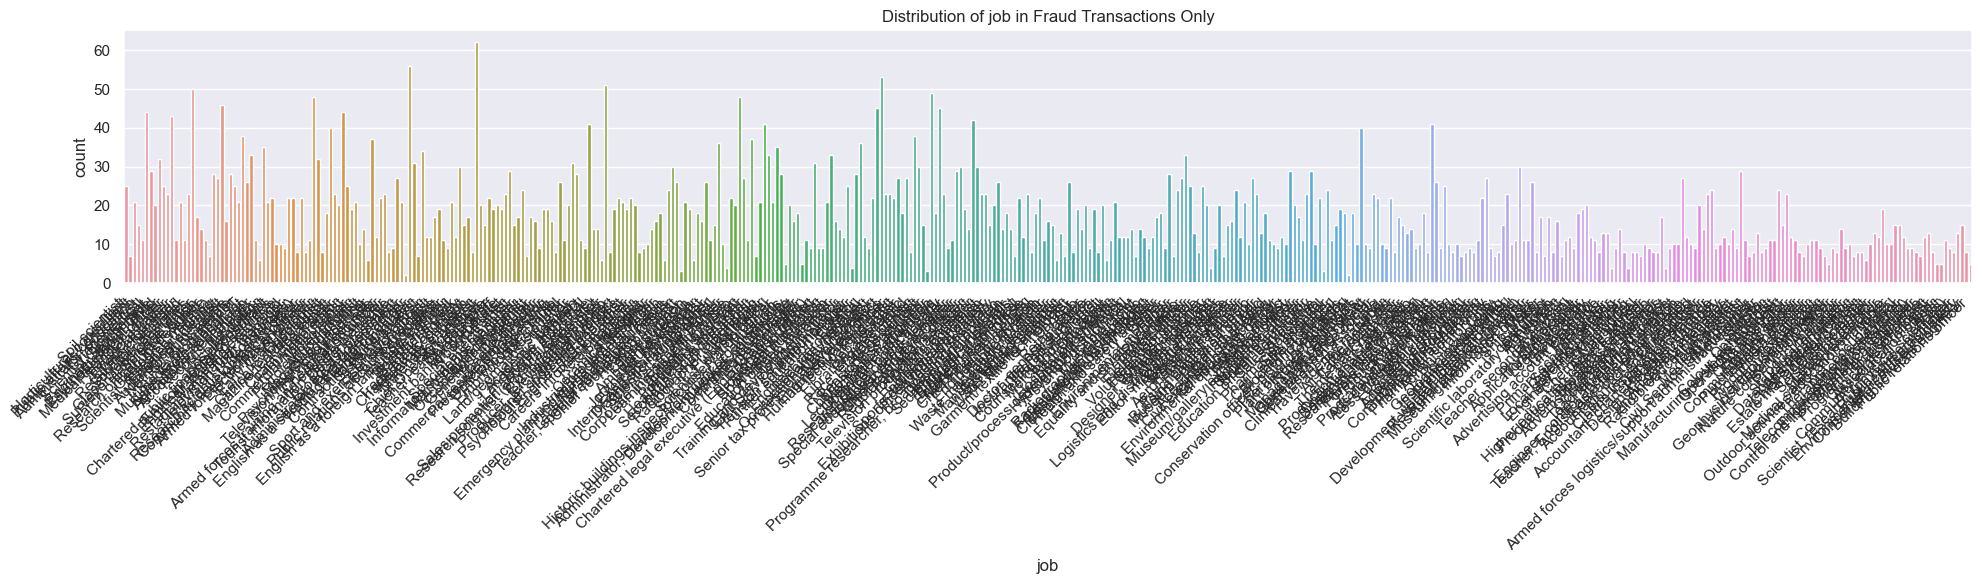

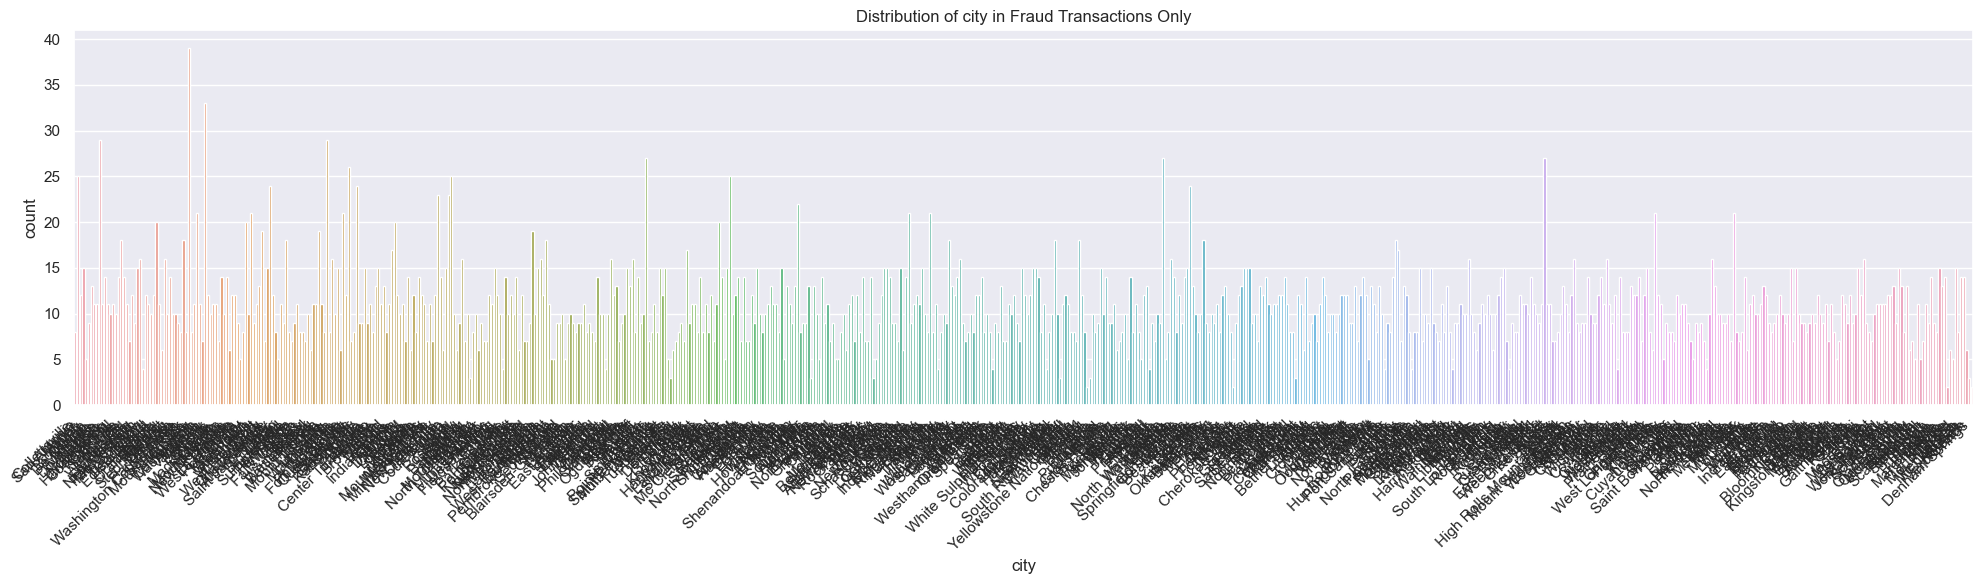

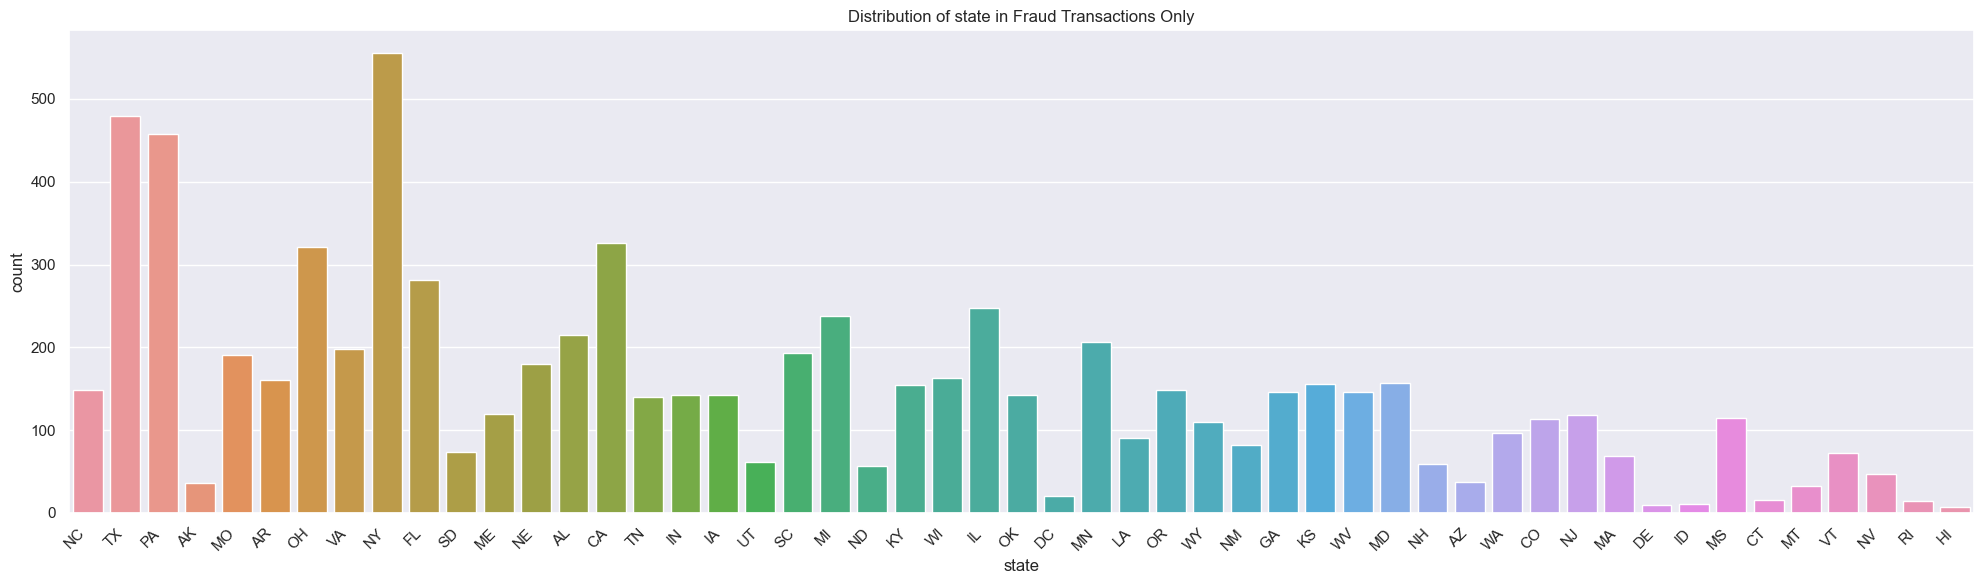

In [10]:
# Subset of fraud-only transactions
fraud_only = creditFraudTrain[creditFraudTrain['is_fraud'] == 1]

# Loop through each column to create countplot for fraud-only data
for col in columns:
    plt.figure(figsize=(20, 6))
    sb.countplot(data=fraud_only, x=col)
    plt.title(f'Distribution of {col} in Fraud Transactions Only')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Ensure no label overlap
    plt.show()


# Handle categorical Variables

<Axes: xlabel='is_fraud', ylabel='amt'>

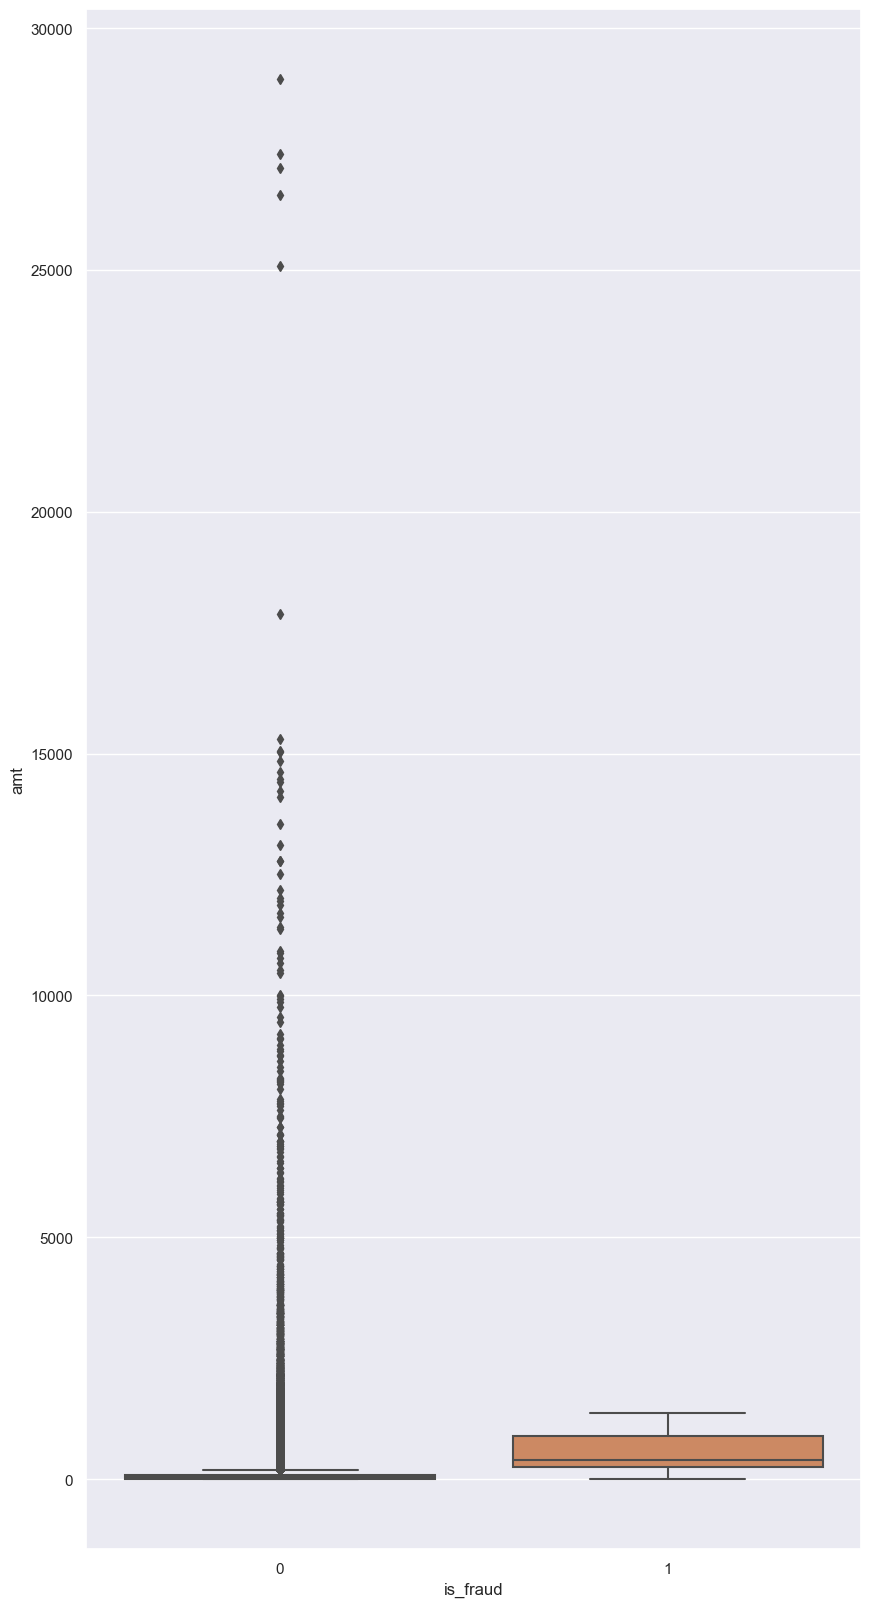

In [11]:
plt.figure(figsize=(10, 20))  
sb.boxplot(data=creditFraudTrain, y='amt', x='is_fraud')

In [12]:
fraud_only['amt'].describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

<Axes: xlabel='is_fraud', ylabel='city_pop'>

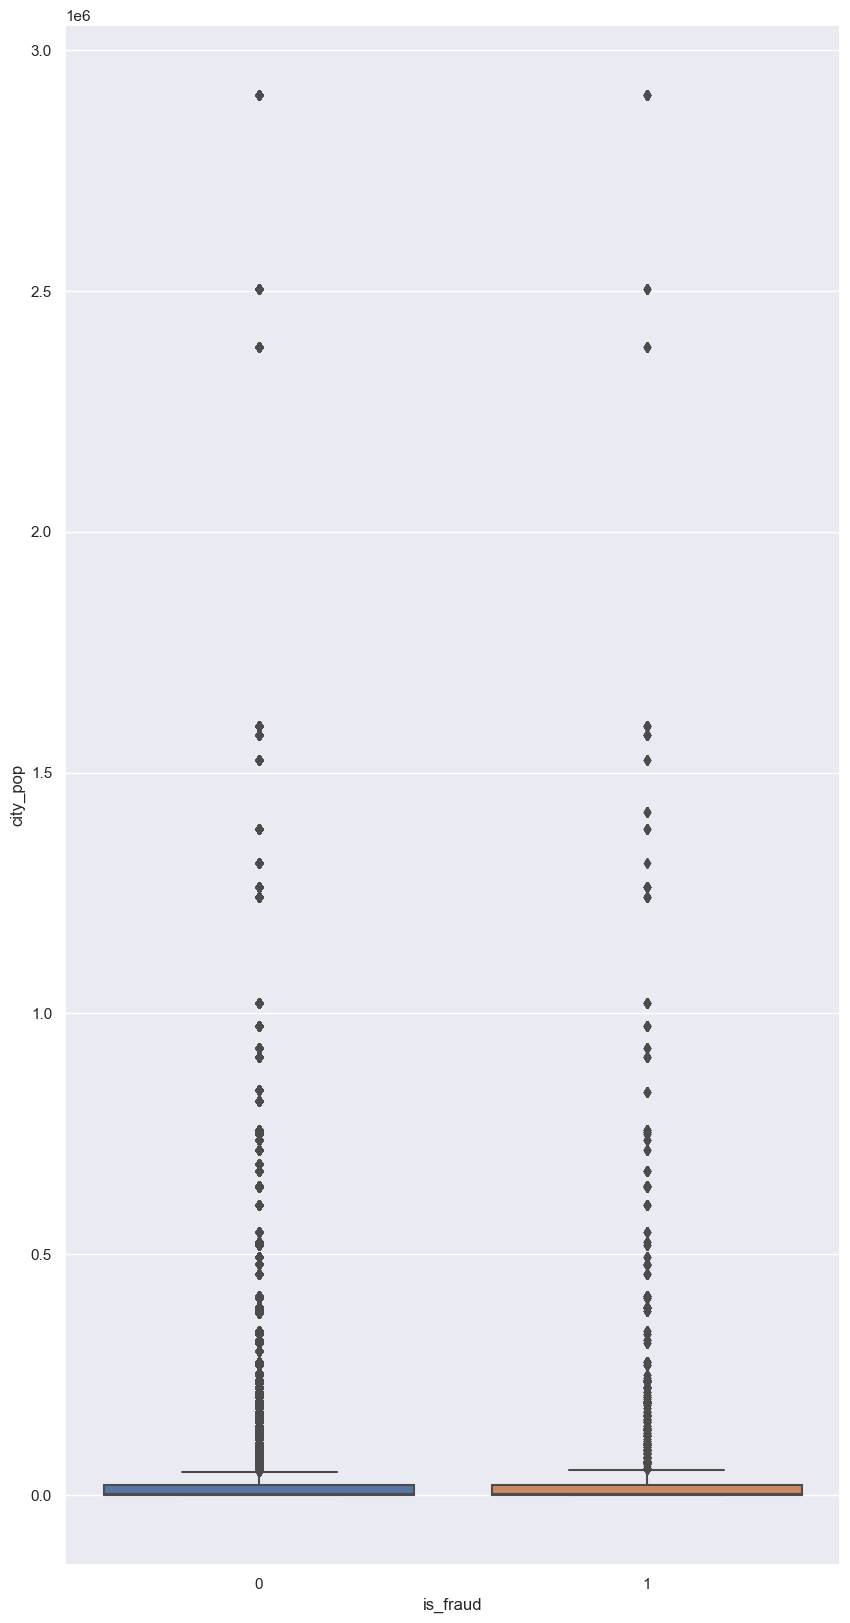

In [13]:
plt.figure(figsize=(10, 20))  
sb.boxplot(data=creditFraudTrain, y='city_pop', x='is_fraud')

## Scatter plot at city level; among city population, amount, and fraud rate
It groups the data by city and calculates:
- The mean transaction amount for each city
- The city population (assuming it's constant for each city)
- The fraud rate (mean of 'is_fraud' for each city)

It then creates a scatter plot where:
- The x-axis represents the average transaction amount
- The y-axis represents the city population
- The size of each point represents the fraud rate

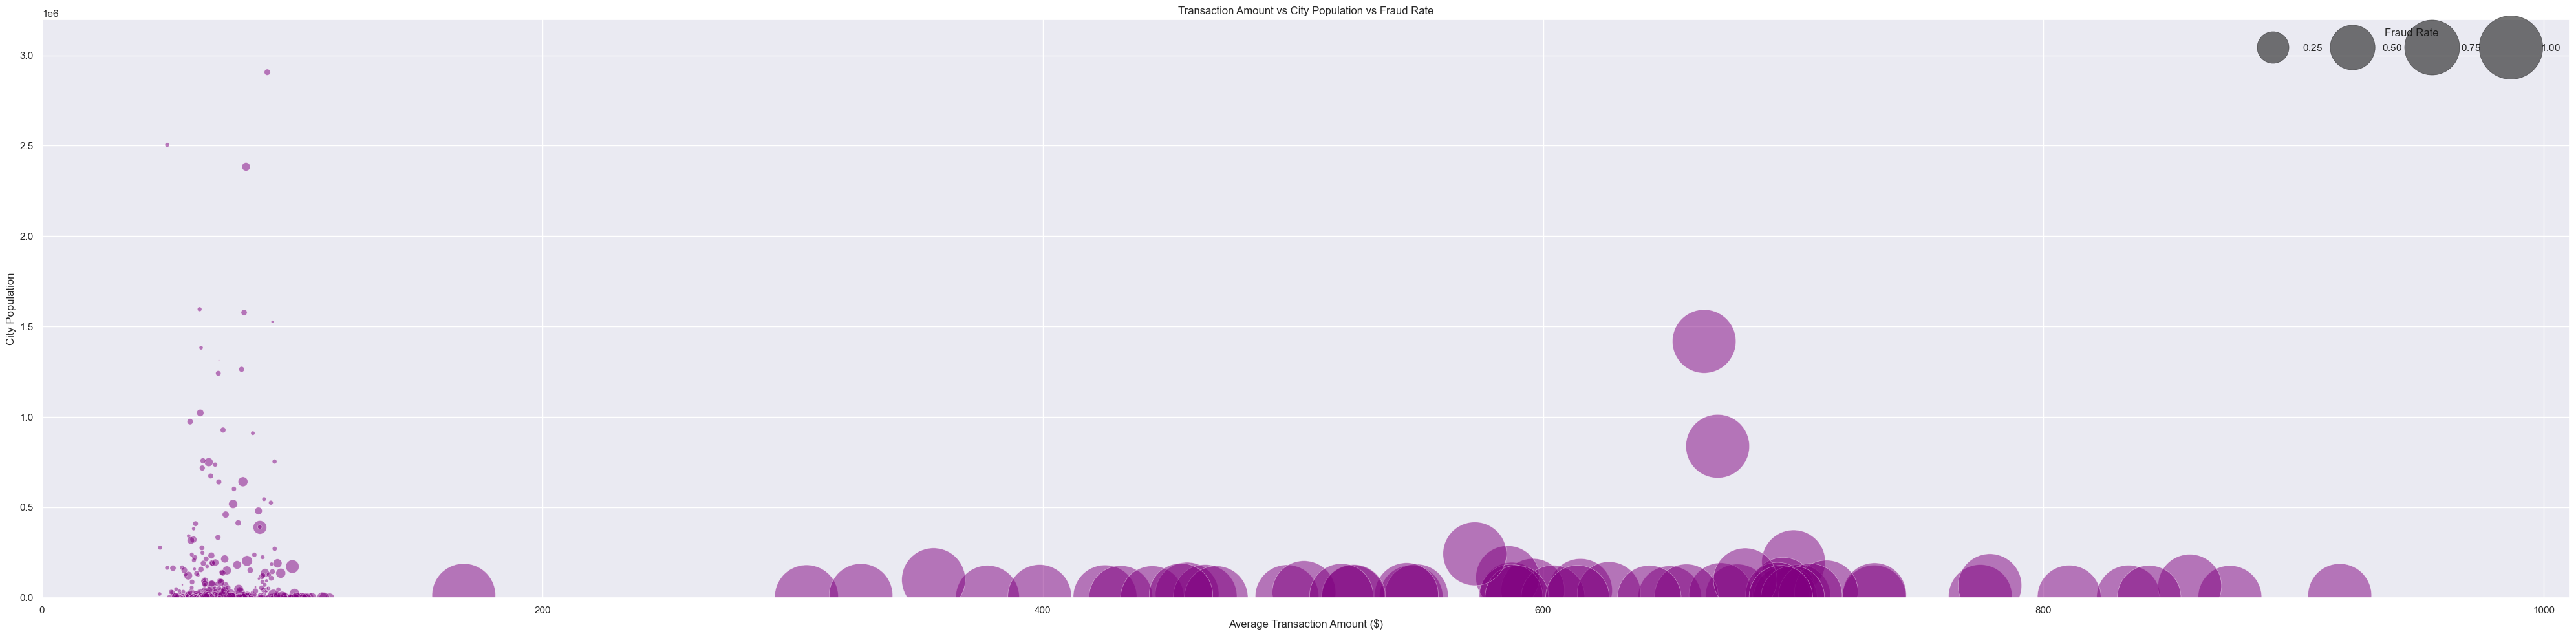

              amt      city_pop    is_fraud
count  894.000000  8.940000e+02  894.000000
mean   105.679997  6.275986e+04    0.071647
std    137.608146  2.334581e+05    0.244757
min     42.951671  2.300000e+01    0.000000
25%     61.168584  7.620000e+02    0.002574
50%     67.518079  2.583500e+03    0.006263
75%     87.160452  1.516950e+04    0.011479
max    918.425556  2.906700e+06    1.000000


In [36]:
# Group by city and calculate metrics
grouped = creditFraudTrain.groupby('city').agg({
    'amt': 'mean',
    'city_pop': 'first',  # Assuming city population is constant for each city
    'is_fraud': 'mean'  # This gives us the fraud rate
}).reset_index()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(40, 10))

# Adjust the scale of the size to reduce overlapping circles
size_scale_factor = 5000  # Adjust this factor for better scaling

scatter = ax.scatter(grouped['amt'], grouped['city_pop'], 
                     s=grouped['is_fraud'] * size_scale_factor,  # Scale down the size
                     alpha=0.5, color='purple', edgecolor='w', linewidth=0.5)

# Customize the plot
ax.set_xlabel('Average Transaction Amount ($)')
ax.set_ylabel('City Population')
ax.set_title('Transaction Amount vs City Population vs Fraud Rate')
ax.grid(True)

# Set axis limits (adjust these based on your data)
ax.set_xlim(0, grouped['amt'].max() * 1.1)
ax.set_ylim(0, grouped['city_pop'].max() * 1.1)

# Add horizontal legend inside the plot
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4, func=lambda x: x/size_scale_factor)

# Customize the legend to be horizontal and inside the plot
legend = ax.legend(handles, labels, loc="upper right", title="Fraud Rate",
                   ncol=4, handletextpad=2.0, frameon=False)

plt.tight_layout()
plt.show()

# Print some statistics for verification
print(grouped.describe())

In [41]:
df=creditFraudTrain[['amt','city_pop', 'is_fraud']]
df.describe()

,amt,city_pop,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,5.788652e-03
std,1.603160e+02,3.019564e+05,7.586269e-02
min,1.000000e+00,2.300000e+01,0.000000e+00
25%,9.650000e+00,7.430000e+02,0.000000e+00
50%,4.752000e+01,2.456000e+03,0.000000e+00
75%,8.314000e+01,2.032800e+04,0.000000e+00
max,2.894890e+04,2.906700e+06,1.000000e+00


# Time vs Fraud
### Fraud Rate by Hour

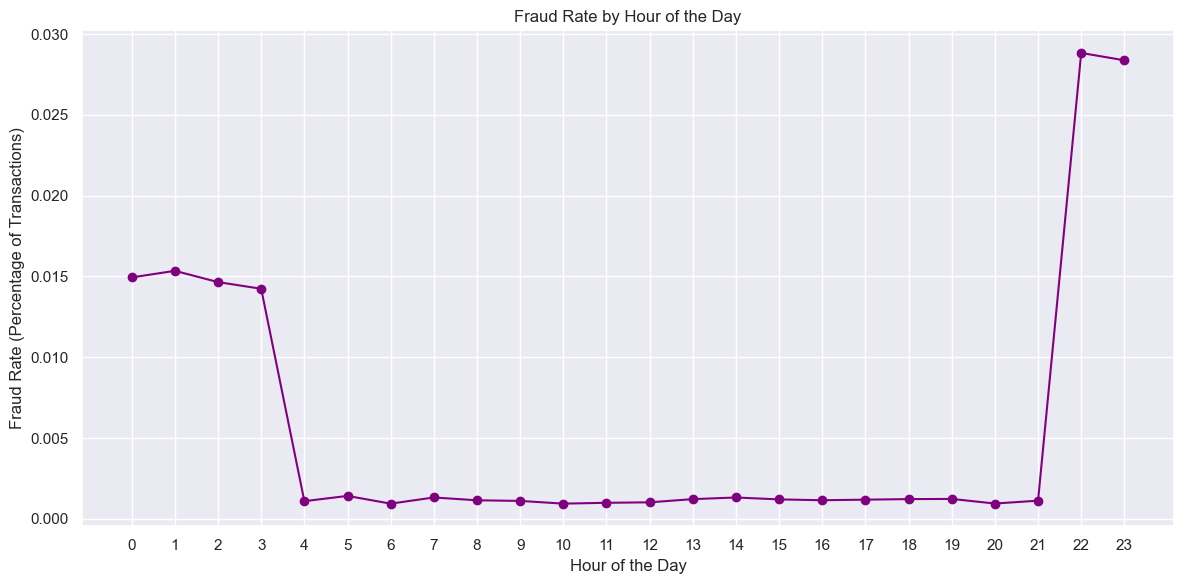

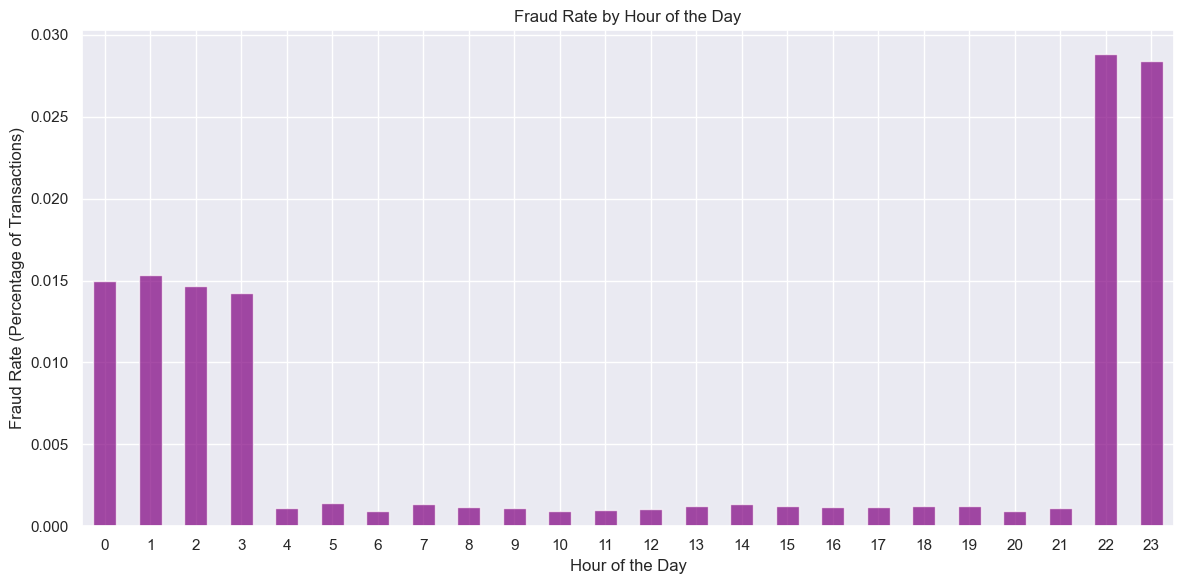

In [47]:
# Convert 'time' column to datetime format
creditFraudTrain['trans_date_trans_time'] = pd.to_datetime(creditFraudTrain['trans_date_trans_time'])

# Extract hour of the day
creditFraudTrain['hour'] = creditFraudTrain['trans_date_trans_time'].dt.hour  

# Group by 'hour' and calculate the fraud rate
fraud_rate_by_hour = creditFraudTrain.groupby('hour')['is_fraud'].mean()

# Create a line plot for the fraud rate by hour
plt.figure(figsize=(12, 6))
plt.plot(fraud_rate_by_hour.index, fraud_rate_by_hour.values, marker='o', linestyle='-', color='purple')
plt.title('Fraud Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate (Percentage of Transactions)')
plt.grid(True)
plt.xticks(ticks=range(0, 24))  # Set x-ticks for each hour
plt.tight_layout()
plt.show()

# Bar Plot for Fraud Rate by Hour
plt.figure(figsize=(12, 6))
fraud_rate_by_hour.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Fraud Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate (Percentage of Transactions)')
plt.grid(True)
plt.xticks(rotation=0)  # Keep x-labels horizontal for better readability
plt.tight_layout()
plt.show()

### Number of frauds by hour (zoom in into is_fraud==1)

/var/folders/_1/83xvthpj6c9d8ykgghld9wy40000gn/T/ipykernel_1241/1582766812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_only['trans_date_trans_time'] = pd.to_datetime(fraud_only['trans_date_trans_time'])
/var/folders/_1/83xvthpj6c9d8ykgghld9wy40000gn/T/ipykernel_1241/1582766812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_only['hour'] = fraud_only['trans_date_trans_time'].dt.hour


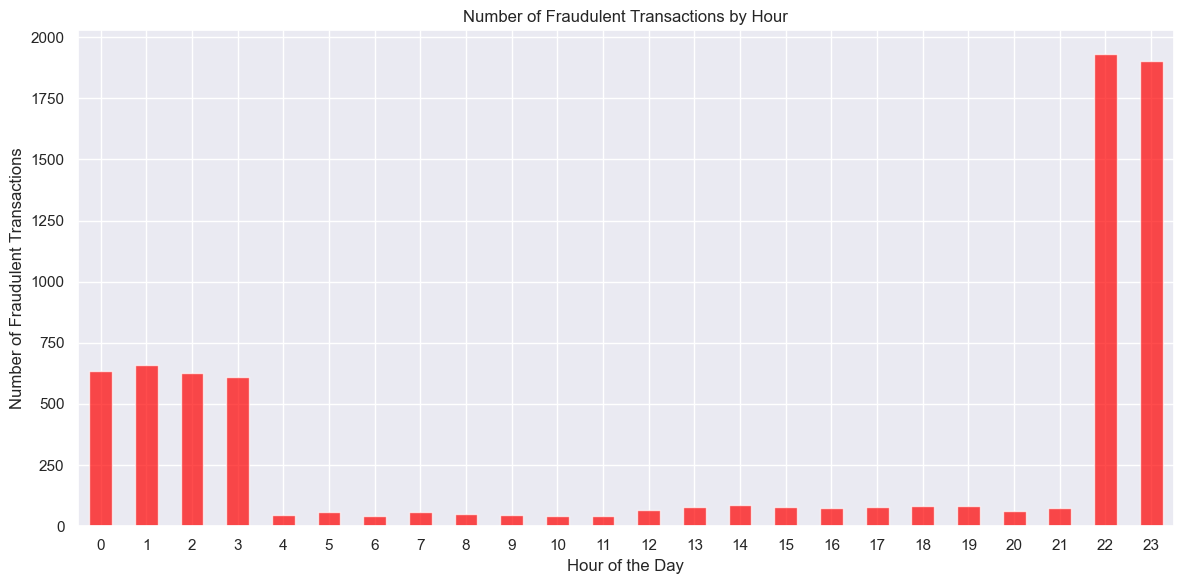

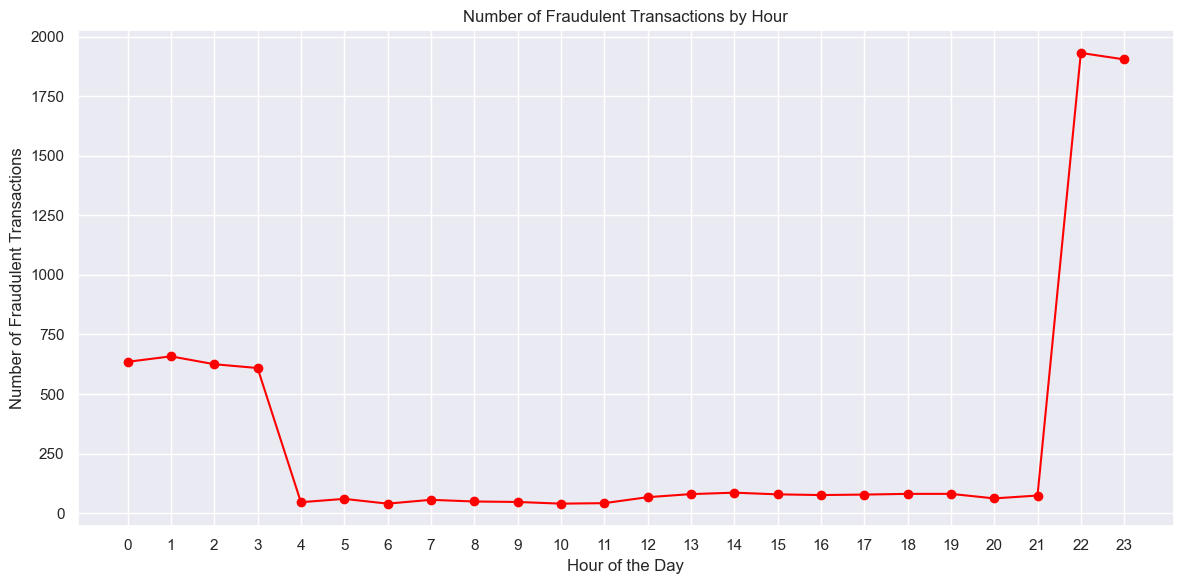

In [46]:
# Convert 'time' column to datetime format
fraud_only['trans_date_trans_time'] = pd.to_datetime(fraud_only['trans_date_trans_time'])

# Extract hour of the day
fraud_only['hour'] = fraud_only['trans_date_trans_time'].dt.hour 

# Group by 'hour' and count the number of frauds for each hour
fraud_count_by_hour = fraud_only.groupby('hour').size()

# Create a bar plot to visualize the number of frauds by hour
plt.figure(figsize=(12, 6))
fraud_count_by_hour.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.xticks(rotation=0)  # Keep x-labels horizontal for better readability
plt.tight_layout()
plt.show()

# Line plot for fraud occurrences by hour
plt.figure(figsize=(12, 6))
plt.plot(fraud_count_by_hour.index, fraud_count_by_hour.values, marker='o', linestyle='-', color='red')
plt.title('Number of Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.xticks(ticks=range(0, 24))  # Set x-ticks for each hour
plt.tight_layout()
plt.show()